# Basit Doğrusal Regresyon

# Model

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
# usecols yerine bu gösterimle de veri indexlerinin sütuna geçmesi önlenebilir
#df = df.iloc[:, 1:]
#df.head()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [6]:
df.isnull().values.any()

False

In [7]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


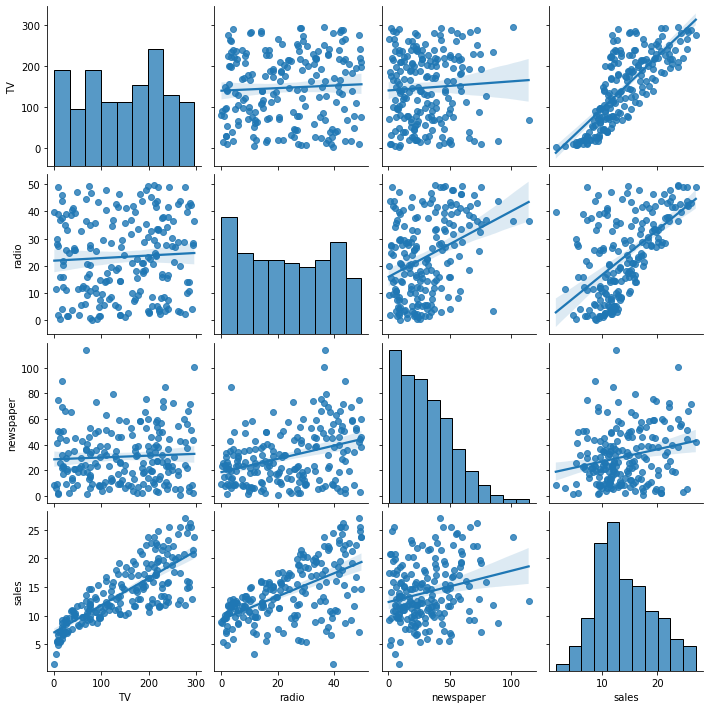

In [8]:
import seaborn as sns
sns.pairplot(df, kind = "reg");

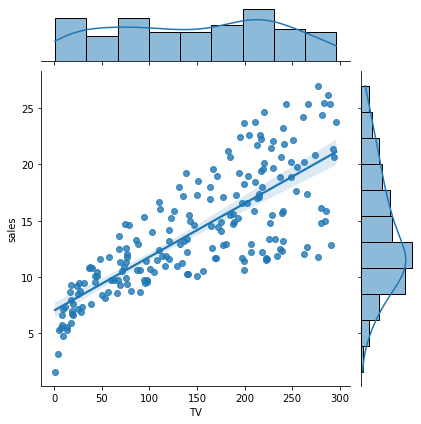

In [9]:
sns.jointplot(x= "TV", y = "sales", data = df, kind = "reg")

## Statsmodels ile modelleme

İstatistiksel modelleme kütüphanesi diyebiliriz

*Neden sm? Aşağıdaki gibi geniş çaplı bir çıktıyı ve istatistiksel testleri scikit learn ile alamıyoruz. (cell 15 model.summary())*

*Bu sebeple bu tip doğrusal regresyon modelinde istatistiksel anlamdaki detaylı verilere erişmek istersek statsmodels ile gerçekleştirilir*

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [11]:
X = df[["TV"]]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [12]:
X = sm.add_constant(X)
X.head()

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [13]:
y = df["sales"]
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [14]:
lm = sm.OLS(y, X)

In [15]:
model = lm.fit()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           1.47e-42
Time:                        19:56:44   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#R-squared = bağımsız değişkenin bağımlı değişkendeki değişkenliği açıklama başarısı
#Yani TV yukarda TV değişkeni sales değişkenliğindeki oynamanın %60'ını açıklamaktadır

#adj R-suqared = R-squared'ın yeni parametre eklenmelerine karşı olan duyarlılığını azaltır.
#yani daha çok parametreli ve karmaşık testlerde adjrs daha doğru değerler gösterebilir.

#F-statistic = modelin anlamlılığının değeridir, yüksek olması daha iyidir
#Prob (F-statistic): modelin F-statistic'inin pvalue değeridir, 0.05'den küçük olması F-statistici doğrulayabilir

In [18]:
# modelin en önemli kısmı sabitlerin yorumlanması kısmıdır.

#const: B0 değeri yani sabit değerdir. TV : B1X kısmındaki B1 değerine denk gelmektedir.

#coef = katsayılar yani B0 ve B1 değerleridir
#std err = değişkenlerin standart hataları verilmiş
#t ve Pt(t'nin pvalue'su) kısmı sonuçların (coef) anlamlı olup olmadığını gösterir
#son kısım ([0.025  0.975]) ise katsayıların(coef) değer aralığını gösteriyor, eğer doğruysa %95 bu aralıkta olur

Yukarıdaki tablodan genel çıkarımımız, TV etkisi olmadan beklenen satışlar 7.03 civarındadır, 
TV harcamalarında 1 birim artışa 0.045 satış artışı beklenebilir -> bu kısımda farklı değişkenleri görseydik onların sales'e etkisini inceleyebilirdik ve değişkenler arasında bir kritik yapabilirdik.

In [19]:
# bu da hem başka bir gösterim olarak dursun hem de TV ve radio beraber etkilerse değişkenler nasıl görünür bakmak için
res = smf.ols("sales ~ TV+radio", data = df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           4.83e-98
Time:                        19:56:44   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model.params

const    7.032594
TV       0.047537
dtype: float64

In [21]:
model.summary().tables[1] # tablolar 0 en üst 1 orta 2 de en alt kısımdan oluşur

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [22]:
model.conf_int() # katsayı aralıklarına erişmek için

,0,1
const,6.129719,7.935468
TV,0.042231,0.052843


In [23]:
# değişkenler = teorik formüldeki elemanlar olarak düşünülmeli -> (B0, B1)
# paramtreler = değişkenlerin değerlerinin kendisiyle çarpılacağı değerler, yani katsayılar

In [24]:
model.f_pvalue # modelin anlamlılığına ilişkin istatistik (pvalue)

1.467389700194647e-42

In [25]:
print("f_pvalue: ", "%.50f" % model.f_pvalue)

f_pvalue:  0.00000000000000000000000000000000000000000146738970


In [26]:
print("fvalue: ", "%.2f" % model.fvalue)

fvalue:  312.14


In [27]:
print("tvalue: ", "%.1f" % model.tvalues[0:1]) # parametre anlamlılığına ilişkin değerler

tvalue:  15.4


In [28]:
model.tvalues

const    15.360275
TV       17.667626
dtype: float64

In [29]:
model.mse_model # modelin anlamlılığına ilişkin model değerlendirme istatistikleri -> hata kareler ortalaması
# ortalama satış değeri 14, değeri 14 olan bir değişken için birim başına hata değeri 3314 yani pek başarılı değil

3314.618166868649

In [30]:
res.mse_model # bu da TV ve radio'yu beraber kullandığımda oluşan, yine yüksek ama daha iyi

2430.117384966191

In [31]:
model.rsquared_adj # açıklanabilirlik değeri uygun

0.6099148238341623

#### Modelin tahmin değerlerini ve gerçek değerleri karşılaştırmak

In [32]:
# modelin tahmin ettiği değerler
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [33]:
# gerçek değerler
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [34]:
# modelin matematiksel formülünü oluşturmak

In [35]:
print("Sales = " + str("%.2f" % model.params[0]) + " + TV * " + str("%.3f" % model.params[1]))

Sales = 7.03 + TV * 0.048


In [36]:
# yukarıdaki formül, TV yerine televizyon harcamalarına yapılacak miktar girildiğinde tahimin satışı veriyor

In [37]:
# aşağıda da modelin görsel gösterimi var

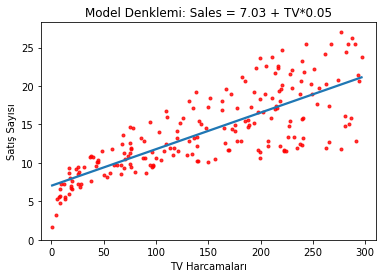

In [38]:
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_ , model.coef_

(7.0325935491276965, array([0.04753664]))

In [41]:
model.score(X,y) #R-squared değeri

0.611875050850071

In [42]:
model.predict(X)[0:10] # tahim edilen değerlere erişmek için, önemli fonksiyon

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

# ------------------------------------------------------------------

# Tahmin

Model denklemi:

Sales = 7.03 + TV*0.04

Örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur?

In [43]:
7.03 + 30*0.04

8.23

In [44]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y) # burada bu hareketle reg nesnesine X'i ve y'yi tanımladık, yani o nesne de değişti aslında

In [45]:
model.predict([[30]])

array([8.45869276])

In [46]:
yeni_veri = [[5],[90],[200]]

In [47]:
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])

# -----------------------------------------------------------------------

## Artıklar ve Makine Öğrenmesindeki Önemi

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()

In [50]:
mse = mean_squared_error(y, model.fittedvalues)

In [51]:
mse # tahmin edilen değerler ile gerçek değerlerin farklarının karelerinin ortalaması (hata kareler ortalaması)
# bu değer birim başına yapılabilecek ortalama hatayı gösteriyor

10.512652915656757

In [52]:
import numpy as np
rmse = np.sqrt(mse)
rmse

3.2423221486546887

In [53]:
reg.predict(X)[0:10] # regresyon üzerinden tahmin yaptırdık, yukarıdaki modul = reg.fit(X,y) kısmı önemli

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [54]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [55]:
k_t = pd.DataFrame({"gercek_y": y, "tahmin_y": reg.predict(X)})

In [56]:
k_t[0:10]

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [57]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]

In [58]:
k_t.head()

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218


In [59]:
k_t["hata_kare"] = k_t["hata"]**2

In [60]:
k_t.head()

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719


In [61]:
np.sum(k_t["hata_kare"])

2102.5305831313512

In [62]:
np.mean(k_t["hata_kare"])

10.512652915656757

In [63]:
np.sqrt(np.mean(k_t["hata_kare"])) # hata kareleri ortalamasının karekök değeri

3.2423221486546887

In [64]:
k_t["hata_abs"] = k_t["hata"].abs()

In [65]:
k_t["hata_abs"].mean() # hata mutlak değerler ortalaması

2.549806038927486

In [66]:
model.resid[0:10] # artıklar

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

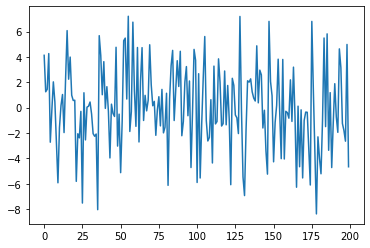

In [67]:
plt.plot(model.resid); # artıkların görselleştirilmesi , buralardaki hatanın 8 ve -8 değerlerine yakın olduğu noktalar önemli

# ----------------------------------------------------------------------

Regresyon modellerinde hata değerleri hesaplanıp optimum parametreler bulunmaya çalışılınır:

#### Yapay sinir ağlarında hatalar (artıklar):

a -> Tekrar dağıtılıp bir ceza işlemi gerçekleştirilip bir iterasyon sonrası küçültülmeye çalışılır

#### Ağaca dağalı yöntemlerde:

a -> Model kurulduktan sonraya ortaya çıkan artıklar üzerine birdaha model kurulur (additive model) -> buradan elde edilen hatalar üzerinde birdaha model kurulur ve işlem böyle devam eder. Sonuçta kümülatif olarak hatalar üzerine tek bir model formunda görülen bir modeller serisi oluşturularak hata optimizasyonuna ulaşmaya çalışılır.

 Bu uygulamalarda genel amacımız hata optimizasyonu oluyor. Ne yapmaya çalışıyorduk ?= 
 
 #### *Makine öğrenmesinde amaç her zaman buradaki hataları minimum yapacak şekilde ilgili parametrelere ulaşmak olacaktır.*


## Kritik Bilgi (veri seti gözlemleri ve hatalara yaklaşım üzerine) :

Hatayı muhattaplara sunarken direkt rmse, sme, mae gibi şekillerde sunmak aldatıcı olur. 

Modeli yaptıktan sonra hatayı sunarken HATALARIN DAĞILIMINA bakmak gerekir. 

#### Burada hataları görselleştirip, başarılı ve başarısız olduğumuz kısımları incelememiz gerekir.

Hata raporunuz: "Veri setinin %95'inde 0.001 hata yaptım, geri kalan %5'inde X kadar hata yaptım." şeklinde olmalı.

Geri kalan %5'e odaklanıp:

*Gözlemlerin kendilerine gidip yapısal bir sıknıtı olup olmadığını incelememiz gerekir.*

*Gözlemlerin taşıdığı karakteristiği (aykırılıklara vesaire) odaklanmamız ve neden başarılı tahmin yapamadığımıza odaklanmamız gerekir*

Bu şekilde neden doğru tahmin yapılamadığını düşünen kişilerin algoritmalarını bugün kullanıyoruz. Yani %5'e odaklanma fikrini 1990'larda pratiğe geçiren insanların.